# Decision Trees

`Decision Trees`　หรือต้นไม้ตัดสินใจ เป็นอัลกอริทึมสำหรับการเรียนรู้จากข้อมูล ที่สามารถใช้ได้กับทั้งงานการจำแนกประเภท (classification) และงานการทำนายค่า (regression) เช่นเดียวกันกับ `support vector machine` ในบทนี้เราจะศึกษาวิธีการเทรน การสร้างรูปภาพต้นไม้ตัดสินใจ และการนำต้นไม้ตัดสินใจไปใช้งาน โดยใช้ไลบารี่ `Scikit-Learn`

## การเทรน และการสร้างรูปภาพต้นไม้ตัดสินใจ

ต่อไปนี้จะแสดงตัวอย่างการเทรนและการสร้างภาต้นไม้ตัดสินใจ โดยใช้ชุดข้อมูล `Iris` ในไลบารี่ `Scikit-Learn` ตัวจำแนกประเภทแบบต้นไม้ตัดสินใจจะถูกจัดไว้ในโมดูล `sklearn.tree` โดยมีชื่อคลาสว่า `DecisionTreeClassifier` การเทรนต้นไม้ตัดสินใจสามารถทำได้ดังตัวอย่างโค้ดต่อไปนี้

In [1]:
import numpy as np

np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal lenght, petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

เราสามารถวาดภาพของต้นไม้ตัดสินใจที่ได้โดยใช้ฟังก์ชัน `export_graphviz` ในโมดูล `sklearn.tree`

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

ผลลัพธ์ที่ได้จากฟังก์ชัน `export_graphviz` คือไฟล์ `iris_tree.dot` ซึ่งเป็นไฟล์ที่เก็บข้อมูลเกี่ยวกับการสร้างรูปกราฟในรูปแบบภาษา `graph description language` ที่เรียกว่า `DOT` จากนั้นเราสามารถแสดงผลรูปภาพของต้นไม้ตัดสินใจได้โดยใช้ไลบารี่ `graphviz` ดังตัวอย่างต่อไปนี้

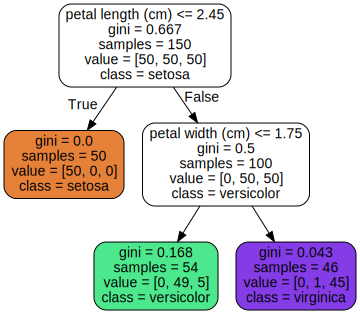

In [3]:
import os
from graphviz import Source

Source.from_file('iris_tree.dot')

ในกรณีที่ต้องการบันทึกรูปภาพของต้นไม้ตัดสินใจ ในรูปแบบ `PDF` หรือ `PNG` สามารถทำได้โดยใช้ command line  `dot` ของแพ็กเกจ `Graphviz`(http://www.graphviz.org/)

In [4]:
!dot -Tpng iris_tree.dot -o iris_tree.png

ไฟล์ `iris_tree.png` ที่ได้ จะเป็นรูปภาพแสดงโครงสร้างของต้นไม้ตัดสินใจ ซึ่งเราสามารถเปิดไฟล์ `png` จาก Notebook ได้ดังโค้ดในเซลล์ถัดไป

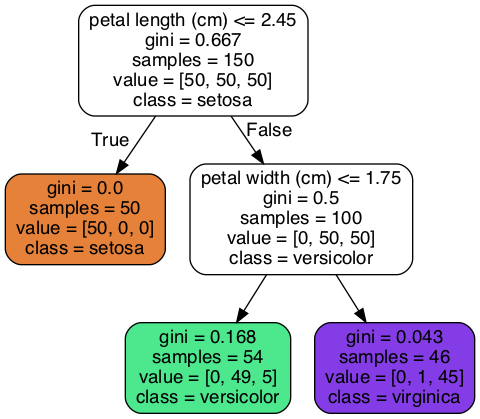

In [5]:
from IPython.display import Image

Image('iris_tree.png')

## การทำนายประเภทด้วยต้นไม้ตัดสินใจ
ขอบเขตการตัดสินใจของ decision tree ที่ได้ข้างต้นสามารถแสดงได้ดังรูปต่อไปนี้

![decision_boundaries-1.png](decision_boundaries-1.png)


**ตัวอย่างที่ 1**
สมมติว่า เรามีดอกไอริสที่เราต้องการทำนายว่าเป็นดอกไอริสสปีชีส์ใด โดยดอกไอริสดังกล่าวมีขนาดความยาวกลีบดอกเท่ากับ 2.1 cm เราสามารถใช้ต้นไม้ตัดสินใจดังแสดงในรูปภาพของเซลล์ก่อนหน้าได้ดังนี้

* เริ่มจาก `root` เนื่องจาก ดอกไอริสดอกนี้ มีค่า `petal length (cm) <= 2.45` ดังนั้นเราจะต้องไปตามเส้นทางของโหนดลูกด้านซ้าย (โหนดสีส้ม)
* เนื่องจากโหนดสีส้ม เป็นใบของต้นไม้ตัดสินใจ (`leaf node`) เราจึงไม่จำเป็นต้อง `traverse` บนต้นไม้ต่อ และได้ผลลัพธ์คำทำนายคือ คลาส `setosa`

**ตัวอย่างที่ 2**
สมมติว่า เรามีดอกไอริสที่เราต้องการทำนายว่าเป็นดอกไอริสสปีชีส์ใด โดยดอกไอริสดังกล่าวมีขนาดความยาวกลีบดอกเท่ากับ 2.5 cm และความว้างกลีบดอกเท่ากับ 1.5 cm เราสามารถใช้ต้นไม้ตัดสินใจดังแสดงในรูปภาพของเซลล์ก่อนหน้าได้ดังนี้

* เริ่มจาก `root` เนื่องจาก ดอกไอริสดอกนี้ มีค่า `petal length > 2.45` ดังนั้นเราจะต้องไปตามเส้นทางของโหนดลูกด้านขวา 
* เนื่องจากโหนดลูกทางด้านขวา เป็น `non-leaf node` ของต้นไม้ตัดสินใจ เราจึงจำเป็นต้อง `traverse` บนต้นไม้ต่อ โดยจากรูปจะเห็นได้ว่า เงื่อนไขสำหรับการตัดสินใจสำหรับโหนดนี้คือ `petal width (cm) <= 1.75` ซึ่งค่าของ `petal width` ของดอกไอริสที่เราต้องการทำนายทำให้เงื่อนไขดังกล่าวเป็น**จริง** ดังนั้นเราจึงต้อง `traverse` ต่อไปยังโหนดลูกทางด้านซ้ายของโหนดปัจจุบัน ซึ่งก็คือ โหนดสีเขียว
* เนื่องจากโหนดสีเขียว เป็น `leaf node` ดังนั้นเราจะได้ผลลัพธ์คำทำนายคือ คลาส `versicolor`

**ตัวอย่างที่ 3**
สมมติว่า เรามีดอกไอริสที่เราต้องการทำนายว่าเป็นดอกไอริสสปีชีส์ใด โดยดอกไอริสดังกล่าวมีขนาดความยาวกลีบดอกเท่ากับ 2.6 cm และความกว้างกลีบดอกเท่ากับ 1.8 cm เราสามารถใช้ต้นไม้ตัดสินใจดังแสดงในรูปภาพของเซลล์ก่อนหน้าได้ดังนี้

* เริ่มจาก `root` เนื่องจาก ดอกไอริสดอกนี้ มีค่า `petal length > 2.45` ดังนั้นเราจะต้องไปตามเส้นทางของโหนดลูกด้านขวา 
* เนื่องจากโหนดลูกทางด้านขวา เป็น `non-leaf node` ของต้นไม้ตัดสินใจ เราจึงจำเป็นต้อง `traverse` บนต้นไม้ต่อ โดยจากรูปจะเห็นได้ว่า เงื่อนไขสำหรับการตัดสินใจสำหรับโหนดนี้คือ `petal width (cm) <= 1.75` ซึ่งค่าของ `petal width` ของดอกไอริสที่เราต้องการทำนายทำให้เงื่อนไขดังกล่าวเป็น**เท็จ** ดังนั้นเราจึงต้อง `traverse` ต่อไปยังโหนดลูกทางด้านขวาของโหนดปัจจุบัน ซึ่งก็คือ โหนดสีม่วง
* เนื่องจากโหนดสีม่วง เป็น `leaf node` ดังนั้นเราจะได้ผลลัพธ์คำทำนายคือ คลาส `virginica`

จากตัวอย่างข้างต้นทั้งสามตัวอย่าง เราสามารถสรุปเป็นอัลกอริทึมสำหรับการทำนายด้วยต้นไม้ตัดสินใจดังนี้คือ

```
DECISION_TREE_PREDICTION(DecisionTree, thisInstance):
    curNode = DecisionTree.root
    
    WHILE curNode is not a leaf node DO
        test the condition of curNode against the attributes of thisInstance
        IF the condition is satisfied THEN
            curNode = curNode.LEFT  # follow the 'True' path
        ELSE
            curNode = curNode.RIGHT # follow the 'False' path
            
    RETURN curNode.class
```

## อัลกอริทึมสำหรับการสร้างต้นไม้ตัดสินใจโดยการเรียนรู้จากข้อมูล

จากรูปต้นไม้ตัดสินใจในตัวอย่างก่อนหน้า จะเห็นได้ว่า แต่ละโหนดจะมีค่าสามค่าคือ `gini`, `samples`, `value` ค่าทั้งสามค่านี้ เป็นค่าที่ได้จากกระบวนการเรียนรู้โดยใช้อัลกอริทึม **Classification and Regression Tree (CART)** ซึ่งเป็นอัลกอริทึมสำหรับสร้างต้นไม้ตัดสินใจที่ผู้สร้างไลบารี่ Scikit-Learn เลือกใช้ (อีกอัลกอริทึมหนึ่งสำหรับสร้างต้นไม้ตัดสินใจที่เป็นที่นิยมใช้คืออัลกอริทึม ID3 และ C4.5 เป็นต้น) 

อัลกอริทึม CART เป็น `non-parametric decision tree learning algorithm` (non-parammetric model หมายถึงโมเดลการเรียนรู้ที่จำนวนพารามิเตอร์ของโมเดล ไม่ได้ถูกกำหนดไว้ล่วงหน้าก่อนการเทรน ดังนั้นโมเดลในกลุ่มนี้จึงสามารถเรียนรู้รูปแบบต่างๆ จากข้อมูลได้อย่างอิสระ) 

CART สร้าง `binary tree` โดยโหนดแต่ละโหนดในต้นไม้จะประกอบด้วยกฎสำหรับการตัดสินใจซึ่งได้ผลลัพธ์เป็นจริงหรือเท็จ แนวคิดหลักของ CART คือการแบ่งชุดข้อมูลออกเป็นสองกลุ่มแบบวนซ้ำโดยใช้ค่า `Gini index` ของชุดข้อมูลหลังการแบ่งกลุ่มเป็นเกณฑ์ในการคัดเลือกฟีเจอร์ 

เพื่อให้เข้าใจง่าย เราจะแสดงตัวอย่างการสร้างต้นไม้ตัดสินใจด้วยอัลกอริทึม CART โดยใช้ชุดข้อมูลที่ประกอบด้วย 14 instance และประกอบด้วยฟีเจอร์ดังนี้คือ
* Outlook: ลักษณะอากาศ เป็น nominal feature มีค่าที่เป็นไปได้ 3 ค่า คือ Sunny, Overcast, Rain
* Temperature: อุณหภูมิ เป็น nominal feature มีค่าที่เป็นไปได้ 3 ค่า คือ Hot, Cool, Mild
* Humidity: ความชื้น เป็น nominal feature มีค่าที่เป็นไปได้ 2 ค่า คือ High, Normal
* Wind: ความแรงลม เป็น nominal feature มีค่าที่เป็นไปได้ 2 ค่า คือ Weak, Strong
* PlayTennis: คือ ตัวแปรเป้าหมาย (target variable) มีค่าที่เป็นไปได้ 2 ค่า คือ No, Yes

ชุดข้อมูล PlayTennis มีข้อมูลดังแสดงในตารางต่อไปนี้


| Day  | Outlook | Temperature | Humidity | Wind | PlayTennis? |
| ---- | ------- | ----------- | -------- | ---- | ----------- |
| 1	| Sunny | Hot | High | Weak | No |
| 2	| Sunny	| Hot | High | Strong |	No |
| 3	| Overcast |	Hot	| High |	Weak |	Yes |
| 4	| Rain	| Mild |	High |	Weak |	Yes |
| 5	| Rain |	Cool |	Normal |	Weak |	Yes |
| 6	| Rain	| Cool	| Normal	| Strong |	No |
| 7	| Overcast |	Cool |	Normal |	Strong |	Yes |
| 8	| Sunny	| Mild	| High |	Weak |	No |
| 9	| Sunny	| Cool	| Normal |	Weak |	Yes |
| 10	| Rain |	Mild |	Normal |	Weak |	Yes |
| 11	| Sunny	| Mild |	Normal |	Strong |	Yes |
| 12	| Overcast |	Mild |	High |	Strong |	Yes |
| 13	| Overcast |	Hot |	Normal |	Weak |	Yes |
| 14	| Rain |	Mild |	High |	Strong |	No |

ตามที่ได้กล่าวแล้ว ตัวชี้วัดคุณภาพของกลุ่มข้อมูลที่ได้หลังจากการแบ่ง (split) คือ `Gini index` ซึ่งเป็นตัวชี้วัดความบริสุทธิ์ของข้อมูล (ข้อมูลที่บริสุทธิ์ หมายถึงข้อมูลที่ประกอบด้วยจุดข้อมูลของคลาสเดียวกัน) สูตรคำนวณค่า `Gini index` คือ

$Gini = 1 - \sum (P_i)^2$ , for i=1 to number of classes

ต่อไปเราจะเริ่มสร้างต้นไม้ตัดสินใจด้วย CART algorithm

### รอบที่ 1

1.1 คำนวณค่า `Gini index` ของฟีเจอร์ `Outlook`
จากชุดข้อมูลเราสามารถนับจำนวน instance โดยแบ่งกลุ่มตามค่าของฟีเจอร์ `Outlook` ได้ดังนี้

| Outlook |	Yes	| No   | จำนวน instances |
| ------- | ----| ---- | ------------------- | 
| Sunny	| 2	 | 3	| 5 |
| Overcast | 4	| 0	| 4 |
| Rain |	3 |	2	| 5 |


$Gini(Outlook=Sunny) = 1 - (2/5)^2 - (3/5)^2 = 1 - 0.16 - 0.36 = 0.48$
$Gini(Outlook=Overcast) = 1 - (4/4)^2 - (0/4)^2 = 1 - 1 - 0 = 0$
$Gini(Outlook=Rain) = 1 - (3/5)^2 - (2/5)^2 = 1 - 0.36 - 0.16 = 0.48$

เพราะฉะนั้น ค่า `Gini index` สำหรับฟีเจอร์ `Outlook` มีค่าเท่ากับ ค่าเฉลี่ยถ่วงน้ำหนักของค่า Gini ที่คำนวณได้ข้างต้น:
$Gini(Outlook) = (5/14) * 0.48 + (4/14) * 0 + (5/14) * 0.48 = 0.171 + 0 + 0.171 = 0.342$

1.2 คำนวณค่า `Gini index` ของฟีเจอร์ `Temperature`
จากชุดข้อมูลเราสามารถนับจำนวน instance โดยแบ่งกลุ่มตามค่าของฟีเจอร์ `Temperature` ได้ดังนี้

| Temperature |	Yes	| No   | จำนวน instances |
| ------- | ----| ---- | ------------------- | 
| Hot	| 2	 | 2	| 4 |
| Cool | 3	| 1	| 4 |
| Mild |	4 |	2	| 6 |

$Gini(Temperature=Hot) = 1 - (2/4)^2 - (2/4)^2 = 1 - 0.25 - 0.25 = 0.5$
$Gini(Temperature=Cool) = 1 - (3/4)^2 - (1/4)^2 = 1 - 0.5625 - 0.0625 = 0.375$
$Gini(Temperature=Mild) = 1 - (4/6)^2 - (2/6)^2 = 1 - 0.444 - 0.111 = 0.445$

เพราะฉะนั้น ค่า `Gini index` สำหรับฟีเจอร์ `Temperature` มีค่าเท่ากับ ค่าเฉลี่ยถ่วงน้ำหนักของค่า Gini ที่คำนวณได้ข้างต้น:
$Gini(Temperature) = (4/14) * 0.5 + (4/14) * 0.375 + (6/14) * 0.445 = 0.142 + 0.107 + 0.190 = 0.439$


1.3 คำนวณค่า `Gini index` ของฟีเจอร์ `Humidity`
จากชุดข้อมูลเราสามารถนับจำนวน instance โดยแบ่งกลุ่มตามค่าของฟีเจอร์ `Humidity` ได้ดังนี้

| Humidity |	Yes	| No   | จำนวน instances |
| ------- | ----| ---- | ------------------- | 
| High	| 3	 | 4	| 7 |
| Normal | 6	| 1	| 7 |

$Gini(Humidity=High) = 1 - (3/7)^2 - (4/7)^2 = 1 - 0.183 - 0.326 = 0.489$
$Gini(Humidity=Normal) = 1 - (6/7)^2 - (1/7)^2 = 1 - 0.734 - 0.02 = 0.244$


เพราะฉะนั้น ค่า `Gini index` สำหรับฟีเจอร์ `Humidity` มีค่าเท่ากับ ค่าเฉลี่ยถ่วงน้ำหนักของค่า Gini ที่คำนวณได้ข้างต้น:
$Gini(Humidity) = (7/14) * 0.489 + (7/14) * 0.244 = 0.245 + 0.122 = 0.367$


1.4 คำนวณค่า `Gini index` ของฟีเจอร์ `Wind`
จากชุดข้อมูลเราสามารถนับจำนวน instance โดยแบ่งกลุ่มตามค่าของฟีเจอร์ `Wind` ได้ดังนี้

| Wiind |	Yes	| No   | จำนวน instances |
| ------- | ----| ---- | ------------------- | 
| Weak	| 6	 | 2	| 8 |
| Strong | 3	| 3	| 6 |

$Gini(Wind=Weak) = 1 - (6/8)^2 - (2/8)^2 = 1 - 0.5625 - 0.062 = 0.375$
$Gini(Wind=Strong) = 1 - (3/6)^2 - (3/6)^2 = 1 - 0.25 - 0.25 = 0.5$

เพราะฉะนั้น ค่า `Gini index` สำหรับฟีเจอร์ `Wind` มีค่าเท่ากับ ค่าเฉลี่ยถ่วงน้ำหนักของค่า Gini ที่คำนวณได้ข้างต้น:
$Gini(Wind) = (8/14) * 0.375 + (6/14) * 0.5 = 0.428$

1.5 เลือกฟีเจอร์ที่มีค่า `Gini index`  ต่ำที่สุดเป็นฟีเจอร์ที่ใช้ในการแบ่งข้อมูล
จากข้อ 1.1 ถึง 1.4 ค่าของ `Gini index` ที่คำนวณได้สำหรับฟีเจอร์แต่ละตัวคือ

$Gini(Outlook) = 0.342$
$Gini(Temperature) = 0.439$
$Gini(Humidity) = 0.367$
$Gini(Wind) = 0.428$

เนื่องจาก `Gini(Outlook)` มีค่าต่ำที่สุด แสดงว่าหากเราแบ่งชุดข้อมูลโดยใช้ฟีเจอร์นี้จะทำให้ชุดข้อมูลผลลัพธ์ที่ได้มีความบริสุทธิ์สูงที่สุด ดังนั้นเราจะเลือก `Outlook` เป็นเกณฑ์ในการตัดสินใจสำหรับโหนดแรกของต้นไม้ตัดสินใจ ดังแผนภาพต่อไปนี้


![cart-step-1.png](cart-step-1.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**

เนื่องจาก โหนดที่ตรงกับค่า `Outlook=Overcast` ประกอบด้วยจุดข้อมูลที่มีค่า `PlayTennis=Yes` ทั้งหมด ดังนั้นเราจึงไม่จำเป็นต้องทำการ split ต่อ จึงกำหนดให้โหนด `Outlook=Overcast` เป็น `leaf node` ดังรูป


![cart-step-2.png](cart-step-2.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**

เนื่องจากยังมีโหนดที่มีค่า Gini ไม่เท่ากับศูนย์เหลืออยู่ในต้นไม้ เราก็จะใช้กระบวนการแบบเดิมในการ split โหนดเหล่านั้น ออกเป็นโหนดลูกจนกว่า `leaf node` ทุกโหนดจะมีค่า Gini เท่ากับศูนย์ (ในบางกรณีการใช้เงื่อนไขการหยุดแบบนี้อาจทำให้เกิด overfit ได้ ดังนั้นในไลบารี่ Scikit-learn จึงมีไฮเปอร์พารามิเตอร์เพื่อป้องกันการเกิด overfit เช่น ค่า `max_depth` เป็นการกำหนดความลึกสูงสุดหรือจำนวนชั้นของต้นไม้ตัดสินใจ เป็นต้น)

### รอบที่  2

ต่อไปเราจะเลือกฟีเจอร์เพื่อมา split โหนด `Outlook=Sunny` จากการคำนวณค่า `Gini index` ของฟีเจอร์สามตัวที่เหลือได้ผลลัพธ์ ดังนี้คือ

$Gini(Temperature) = 0.2$

$Gini(Humidity) = 0$

$Gini(Wind) = 0.466$

ดังนั้น เราจะเลือกใช้ฟีเจอร์ `Humidity` เป็นฟีเจอร์สำหรับการตัดสินใจในโหนดถัดไป ดังแสดงในรูป

![cart-step-3.png](cart-step-3.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**

เนื่องจากโหนดลูกใหม่ทั้งสองโหนด ประกอบด้วยข้อมูลของคลาสเดียวกันทั้งหมด (Gini index = 0) เราจึงไม่จำเป็นต้องทำการแบ่งแยกต่อไป ทำให้เราได้ต้นไม้ตัดสินใจ จากรอบที่ 2 ดังนี้

![cart-step-4.png](cart-step-4.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**


### รอบที่ 3

ต่อไปเราจะคัดเลือกฟีเจอร์เพื่อ split โหนด `Outlook=Rain` จากการคำนวณค่า `Gini index` ของฟีเจอร์สามตัวที่เหลือได้ผลลัพธ์ ดังนี้คือ

$Gini(Temperature) = 0.466$

$Gini(Humidity) = 0.466$

$Gini(Wind) = 0$

เนื่องจาก `Gini(Wind)` มีค่าต่ำที่สุด เราจะเลือกฟีเจอร์ `Wind` เป็นฟีเจอร์สำหรับแบ่งข้อมูลในโหนดถัดไป ดังแสดงในรูป


![cart-step-5.png](cart-step-5.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**

หลังจาก split เรียบร้อยพบว่าทุกโหนดประกอบด้วยข้อมูลที่มาจากคลาสเดียวกันทั้งหมด เราจึงไม่จำเป็นต้อง split โหนดต่อไป ต้นไม้ตัดสินใจที่ได้แสดงดังรูปต่อไป


![cart-step-6.png](cart-step-6.png)
**ข้อมูลรุปภาพจาก: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/**



## ข้อดีและข้อด้อยของ Decision Trees

ต้นไม้ตัดสินใจเป็นอัลกอริทึมการตัดสินใจที่ไม่ขึ้นกับสเกลของข้อมูล สามารถใช้กับข้อมูลที่มีความซับซ้อนได้ และตีความได้ง่าย จึงทำให้เป็นที่นิยมอย่างแพร่หลาย อย่างไรก็ตาม ต้นไม้ตัดสินใจจะมีความอ่อนไหวต่อการเปลี่ยนแปลงของข้อมูลสูง ดังตัวอย่างต่อไปนี้ 

จากต้นไม้ตัดสินใจที่เราสร้างขึ้นสำหรับชุดข้อมูล Iris ด้วยไลบารี่ Scikit-Learn หากเราตัดจุดข้อมูลของดอกไอริส versicolor ที่มีความกว้างกลีบดอกมากที่สุดออกไป ดังนี้คือ

In [6]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest iris versicolor flower

array([[4.8, 1.8]])

In [7]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

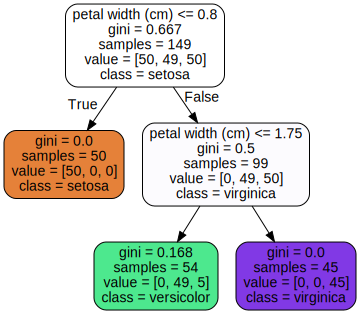

In [8]:
export_graphviz(
    tree_clf_tweaked,
    out_file='iris_tree_tweaked.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file('iris_tree_tweaked.dot')

เมื่อพล็อต decision boundaries ของต้นไม้ตัดสินใจตัวใหม่ที่ได้ ดังรูปในเซลล์ต่อไป จะพบว่า ขอบเขตการตัดสินใจเปลี่ยนไปจากเดิมมาก แม้ว่าเราจะตัดจุดข้อมูลออกไปเพียงแค่จุดเดียว 

![sensitivity_of_decision_tree](sensitivity_of_decision_tree.png)

## การทำนายค่า (Regression) ด้วยต้นไม้ตัดสินใจ

ต้นไม้ตัดสินใจสำหรับทำนายค่า ในไลบารี่ Scikit-Learn อยู่ในคลาส `sklearn.tree.DecisionTreeRegressor` ตัวอย่างต่อไปเป็นการใช้ `DecisionTreeRegressor` ในการทำนายค่าบนชุดข้อมูล Quadratic dataset ที่เราสร้างขึ้นเองดังนี้

In [9]:
# Quadratic training set + noise
np.random.seed(42)
m = 200

X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

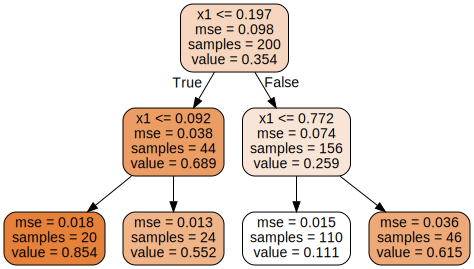

In [11]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file("regression_tree.dot")

จะเห็นว่าต้นไม้ตัดสินใจที่ได้ จะเหมือนกันกับกรณี `DecisionTreeClassifier` แต่มีสิ่งที่ต่างกันคือ แทนที่จะทำนายประเภท ต้นไม้ตัดสินใจที่ได้จะให้คำทำนายค่า ซึ่งในกรณีนี้ คือค่าของตัวแปร $y$ ตัวอย่างเช่น กรณีที่ค่า $x1 = 0.201$ ต้นไม้ตัดสินใจจะให้คำทำนายค่า $y=0.111$ ซึ่งเป็นค่าเฉลี่ยของค่า $y$ ของจุดข้อมูลทุกจุดที่ทำให้เงื่อนไขของ path ที่เริ่มจาก root node จนถึงโหนดสีขาวด้านล่างมีค่าความจริงเป็นจริง

หากเราพล็อต decision boundaries ของต้นไม้ตัดสินใจที่ได้ จะได้ดังรูป
![decision_boundaries-2.png](decision_boundaries-2.png)

รูปทางด้านซ้ายแสดงขอบเขตการตัดสินใจของต้นไม้ตัดสินใจเมื่อกำหนด `max_depth=2` และ รุปทางด้านขวาเป็นขอบเขตการตัดสินใจที่ได้เมื่อกำหนดให้ `max_depth=3` จะเห็นได้มาเมื่อต้นไม้ตัดสินใจมีความลึกมากขึ้น ขอบเขตการตัดสินใจจะมีความซับซ้อนเพิ่มขึ้น ซึ่งจะทำให้เกิด overfitting ได้เมื่อต้นไม้มีความลึกมาก ๆ

## ตัวอย่างการสร้างต้นไม้ตัดสินใจและการทำ Parameter Tuning 


เพื่อแสดงตัวอย่างการใช้งานโมเดลต้นไม้ตัดสินใจในทางปฏิบัติ ในหัวข้อนี้ จะแสดงตัวอย่างการสร้างต้นไม้ตัดสินใจและปรับแต่งค่าพารามิเตอร์โดยใช้ชุดข้อมูลที่สร้างจากฟังก์ชัน `make_moons` ของไลบารี่ Scikit-Learn

1. สร้างชุดข้อมูลขนาด 10000 instances โดยกำหนดค่า `noise=0.4`

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. แบ่งชุดข้อมูลออกเป็นชุดฝึกฝน และชุดทดสอบ

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

3. สร้างอ็อบเจ็กต์ `GridSearchCV` เพื่อใช้ค้นหาค่าไฮเปอร์พารามิเตอร์ `max_leaf_nodes` และ `min_samples_split` ของ `DecisionClassifier` ที่ดีที่สุด

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
      

4. ค่าไฮเปอร์พารามิเตอร์ที่ดีที่สุดคือ

In [15]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

5. วัดประสิทธิภาพของโมเดลที่ได้บนชุดข้อมูลทดสอบ

In [16]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## แบบฝึกหัด

1. จงหาค่าความลึกของต้นไม้ตัดสินใจที่สร้างขึ้นโดยใช้อัลกอริทึม CART บนชุดข้อมูลฝึกฝนที่มีจำนวน 1,000,000 instances โดยไม่มีข้อจำกัดใดๆ 

2. จงแสดงการสร้างต้นไม้ตัดสินใจบนชุดข้อมูล PlayTennis โดยใช้ค่า Information Gain แทนค่า Gini Index สำหรับข้อมูลเกี่ยวกับการใช้ information gain กับการสร้างต้นไม้ตัดสินใจสามารถศึกษาได้จาก https://bit.ly/2VRBJPa

3. หากพบว่าต้นไม้ตัดสินใจ overfit กับชุดข้อมูล เราควร เพิ่ม หรือ ลด ค่า `max_depth`

4. หากพบว่าต้นไม้ตัดสินใจ overfit กับชุดข้อมูล เราควรทำการสเกลค่าของฟีเจอร์ให้อยู่ในช่วงมาตรฐานหรือไม่?